## Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm import tqdm

## Data

In [4]:
from keras.preprocessing.image import ImageDataGenerator, load_img

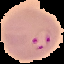

In [7]:
load_img(r"C:\Users\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png",target_size=(64,64))

In [11]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [13]:
image_dir = r"C:\Users\cell_images"
size = 64
dataset = []
label = []

In [52]:
parasitized_img = os.listdir(image_dir+"\\Parasitized")

for i,img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Parasitized\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(0)

In [54]:
uninfected_img = os.listdir(image_dir+"\\Uninfected")

for i,img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Uninfected\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(1)

In [60]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.2 ,random_state = 0)

### CNN Architecture

In [61]:
Input_shape = (size,size,3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

flat = k.Flatten()(drop2)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)


In [67]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0   

In [70]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 5,validation_split=0.1,shuffle=False)

Epoch 1/5
327/327 [==============================] - 47s 145ms/step - loss: 0.3059 - accuracy: 0.8727 - val_loss: 0.7151 - val_accuracy: 0.8346
Epoch 2/5
327/327 [==============================] - 46s 141ms/step - loss: 0.2790 - accuracy: 0.8843 - val_loss: 0.6360 - val_accuracy: 0.8079
Epoch 3/5
327/327 [==============================] - 47s 143ms/step - loss: 0.2604 - accuracy: 0.8904 - val_loss: 0.4025 - val_accuracy: 0.8626
Epoch 4/5
327/327 [==============================] - 45s 137ms/step - loss: 0.2483 - accuracy: 0.8975 - val_loss: 0.4513 - val_accuracy: 0.8738
Epoch 5/5
327/327 [==============================] - 47s 145ms/step - loss: 0.2348 - accuracy: 0.9025 - val_loss: 0.3173 - val_accuracy: 0.8876


In [71]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

182/182 [==============================] - 3s 17ms/step - loss: 0.3200 - accuracy: 0.8863
Test accuracy: 88.63%
